In [21]:
import json, glob, os, io
import pandas as pd
from datetime import time, timedelta, datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import islice
import matplotlib.animation as animation
# from IPython.display import HTML
import matplotlib.style as style
import pickle
import numpy as np
style.available
style.use('fivethirtyeight')

# returns a list of all paths to files that are of interest
def get_json_paths(path="./"):
    return glob.glob("{}**/message_1.json".format(path),recursive=True)

# returns the number of messages to every contact between 2 timestamps in a discussion
def data_from_messages_json( since, to, name, path):
#     messages = pd.read_json(path)["messages"]
    with io.open(path, mode="r", encoding="utf-8") as f:
        raw = json.load(f)
    messages = raw["messages"]
    temp_messages = []
    for message in messages:
#         print("{} > {} and {} < {} donc : {}".format(message["timestamp_ms"],since,message["timestamp_ms"],to,message["timestamp_ms"] > since and message["timestamp_ms"]<to))
        if message["timestamp_ms"] > since and message["timestamp_ms"]<to:
            temp_messages.append(message)
    messages=temp_messages
    
    participants = []
    for d in raw["participants"]:
        if d["name"]!=name:
            participants.append(d["name"])
    
    #il se passe un truc chelou la dessous ça parait pas ultra opti
    d = {}
    for k in ['sender_name', 'timestamp_ms']:
      d[k] = list(d[k] for d in messages)
    return (participants, d["sender_name"].count(name))

# returns a list of every contact in your data
def all_participants(dict_nb_message_per_week):
    res = []
    for week in dict_nb_message_per_week.values():
        for participant in week.keys():
            if participant not in res:
                res.append(participant)
    return res

# returns a dict with a rgb tuple for every contact
def get_bars_color(contacts):
    np.random.seed(420) # seed to be consistent
    return {k:v for k,v in zip(contacts, np.random.rand(len(contacts),3))}
        
# returns a dictionary with the 10 most talked to contacts between 2 timestamps
def nb_message(since, to, name, dir_path="./"):
    paths = get_json_paths()
    res={}
    for path in paths:
        (participants, nb) = data_from_messages_json( since, to, name, path) 
        for participant in participants:
            try:
                res[participant]=res[participant]+nb
            except:
                res[participant]=nb
    return {k: v for k, v in res.items() if v > 10}

def draw_barchart(week, nb_msg_per_week, colors):
    nb_msg_per_contact = nb_msg_per_week[week]
    ax.clear()
    contacts=list(nb_msg_per_contact.keys())
    ax.barh(contacts, list(nb_msg_per_contact.values()), color=[colors[x] for x in contacts])
    dx = max(list(nb_msg_per_contact.values())) / 200 if nb_msg_per_contact else 0
    
    for i, (value, name) in enumerate(zip(list(nb_msg_per_contact.values()), list(nb_msg_per_contact.keys()))):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
                       
    date = datetime.fromtimestamp(round(week)).strftime("%d-%m-%Y")
    print("drawing week {}".format(date))
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    
def list_weeks_since(nb_weeks):
    return [datetime.now()+timedelta(weeks=-nb_week) for nb_week in range(2,nb_weeks)]
        
# returns a list of every week since nb week with the top 10 most talked to contacts and the number of messages to each one of them    
def dict_nb_msg_per_week(nb_weeks, name):
    res = {}
    for week in list_weeks_since(nb_weeks):
        this_week = {k: v for k, v in sorted(nb_message(datetime.timestamp(week+timedelta(weeks=-4))*1000,datetime.timestamp(week)*1000, name).items(), key=lambda item: item[1])}
        week_top = {}
        for sender in list(this_week)[-10:]:
            week_top.update({sender:this_week[sender]})
        res.update({datetime.timestamp(week):week_top})
    return res

## visualisation but it's not working in a function, only in a cell it's strange

def friendviz(nb_weeks, name):
    #nb_msg_week = {timestamp:[top10]}
#     nb_msg_week=dict_nb_msg_per_week(nb_weeks)
#     fig, ax = plt.subplots(figsize=(15, 15))
#     animator= animation.FuncAnimation(fig, draw_barchart, frames=list(nb_msg_week.keys()), fargs=(nb_msg_week,))
#     animator.save('friends2.gif', fps=1, dpi=200)
    nb_msg_week = dict_nb_msg_per_week(nb_weeks, name)
    frames=list(nb_msg_week.keys())
    frames.reverse() # pour l'ordre d'apparition des slides
    fig, ax = plt.subplots(figsize=(15, 12))
    animator= animation.FuncAnimation(fig,draw_barchart, frames=frames,fargs=(nb_msg_week,))
    animator.save('friends_monthly_{}w.gif'.format(nb_weeks), fps=1, dpi=300),

## Data
If you tinker with your data it might be helpful to serialize it

In [26]:
name = "Your Name"
to_pickle = dict_nb_msg_per_week(10, name)
filename = 'friends_monthly_10w.pickle'
outfile = open(filename,'wb')
pickle.dump(to_pickle,outfile)
outfile.close()

In [2]:
infile = open('friends_monthly_6y.pickle','rb')
monthly_6y = pickle.load(infile)
infile.close()
# print(monthly_6y)

## Bar chart race

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


drawing week 24-04-2016
drawing week 24-04-2016
drawing week 01-05-2016
drawing week 08-05-2016
drawing week 15-05-2016
drawing week 22-05-2016
drawing week 29-05-2016
drawing week 05-06-2016
drawing week 12-06-2016
drawing week 19-06-2016
drawing week 26-06-2016
drawing week 03-07-2016
drawing week 10-07-2016
drawing week 17-07-2016
drawing week 24-07-2016
drawing week 31-07-2016
drawing week 07-08-2016
drawing week 14-08-2016
drawing week 21-08-2016
drawing week 28-08-2016
drawing week 04-09-2016
drawing week 11-09-2016
drawing week 18-09-2016
drawing week 25-09-2016
drawing week 02-10-2016
drawing week 09-10-2016
drawing week 16-10-2016
drawing week 23-10-2016
drawing week 30-10-2016
drawing week 06-11-2016
drawing week 13-11-2016
drawing week 20-11-2016
drawing week 27-11-2016
drawing week 04-12-2016
drawing week 11-12-2016
drawing week 18-12-2016
drawing week 25-12-2016
drawing week 01-01-2017
drawing week 08-01-2017
drawing week 15-01-2017
drawing week 22-01-2017
drawing week 29-

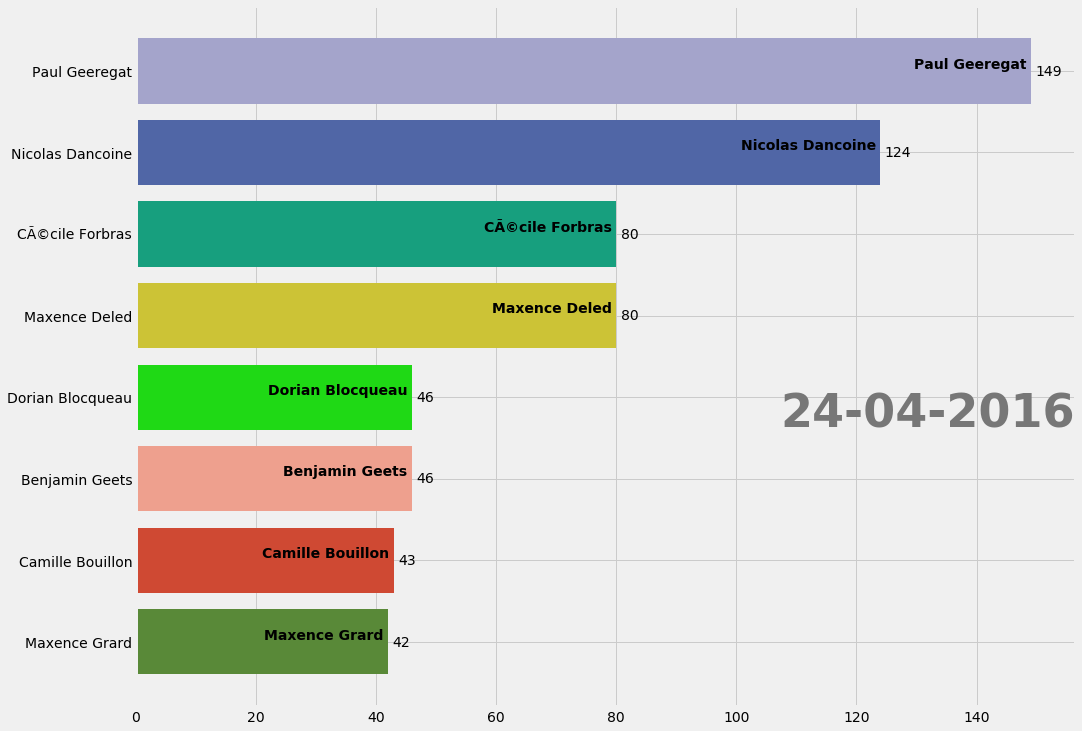

In [28]:
# If your name has an accent well you can search in your data for a place where it is written,
# because accents are not supported. Yet.
name = "Louis Lenoir"
# replace 52*6 by how much time you want
nb_msg_week = dict_nb_msg_per_week(52*4, name)
# type the name of your output file
out_name="friendviz_4y.gif"

colors = get_bars_color(all_participants(nb_msg_week))

frames=list(nb_msg_week.keys())
frames.reverse() # pour l'ordre d'apparition des slides

fig, ax = plt.subplots(figsize=(15, 12))
animator= animation.FuncAnimation(fig,draw_barchart, frames=frames,fargs=(nb_msg_week,colors,))
animator.save(out_name, fps=1, dpi=200)